In [0]:
import numpy as np

from sklearn.datasets import make_blobs

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

# torch.manual_seed(1)

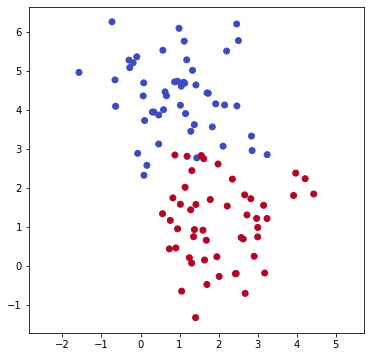

In [9]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, shuffle=True)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.axis('equal')
plt.show()

In [10]:
class LogisticRegression(nn.Module):
  def __init__(self, n_features):
    super(LogisticRegression, self).__init__()
    self.n_features = n_features
    self.linear = nn.Linear(self.n_features, 2)

  def forward(self, x):
    linear_regression = self.linear(x)
    return F.log_softmax(linear_regression, dim=1)

model = LogisticRegression(X.shape[1])
print(model)

X_torch = torch.Tensor(X)
target = torch.LongTensor(y)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=2, bias=True)
)


In [11]:
for param in model.parameters():
  print(param)

with torch.no_grad():
  log_probs = model(X_torch)
  print(log_probs[:10, :])

Parameter containing:
tensor([[-0.1534, -0.1351],
        [-0.6650,  0.0246]], requires_grad=True)
Parameter containing:
tensor([ 0.2058, -0.6774], requires_grad=True)
tensor([[-0.0660, -2.7507],
        [-0.2466, -1.5208],
        [-0.7287, -0.6588],
        [-0.4528, -1.0102],
        [-0.0912, -2.4398],
        [-0.2682, -1.4471],
        [-0.3873, -1.1359],
        [-0.0760, -2.6147],
        [-0.4572, -1.0025],
        [-0.2032, -1.6936]])


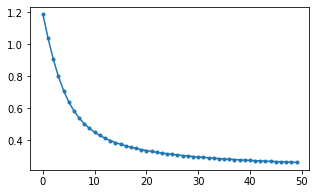

In [12]:
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

loss_for_plotting = list()
for epoch in range(50):
  model.zero_grad()
  log_probs = model(X_torch)
  loss = loss_function(log_probs, target)
  loss.backward()
  loss_for_plotting.append(loss.item())
  optimizer.step()

plt.figure(figsize=(5, 3))
plt.plot(loss_for_plotting, '.-')
plt.show()

In [13]:
with torch.no_grad():
  log_probs = model(X_torch)
  print(log_probs[:10, :])

y_hat = np.argmax(log_probs.numpy(), axis=1)
print("y_hat:\t", y_hat[:20])
print("y:\t", y[:20])

tensor([[-3.4067, -0.0337],
        [-1.1698, -0.3717],
        [-0.0072, -4.9363],
        [-0.1337, -2.0780],
        [-3.1143, -0.0454],
        [-0.4253, -1.0601],
        [-0.0868, -2.4875],
        [-2.9883, -0.0517],
        [-0.0565, -2.9011],
        [-1.6725, -0.2080]])
y_hat:	 [1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1]
y:	 [1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1]


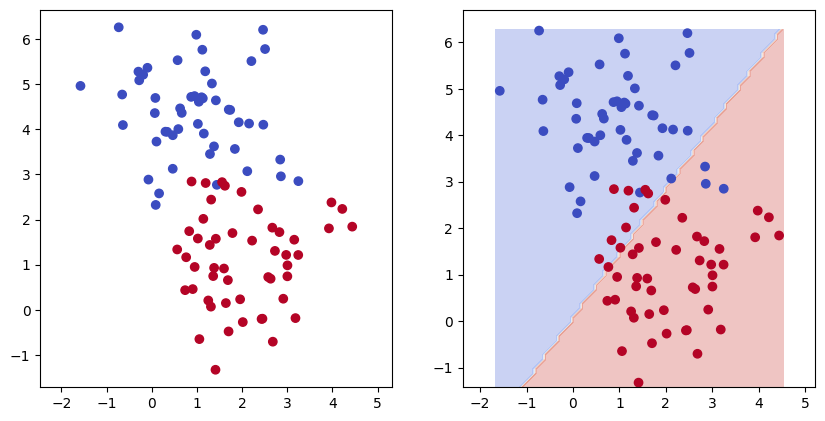

In [14]:
h = .1
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

X_test = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
log_probs_test = model(X_test)
Z = np.argmax(log_probs_test.detach().numpy(), axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.axis('equal')
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=.3, cmap='coolwarm')#, levels=[0])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.axis('equal')
plt.show()